# 모델 저장과 전이 학습
---

## 모델 저장
> <font color='red'><b>강의 팁</b></font>
- 구글 드라이브를 mount하고 모델이랑 데이터를 드라이브에 저장하는 것을 추천함.
- torchsummary 모듈 사용하기

- 파이토치에선 model.save() 를 제공함
- 학습의 결과를 저장하는 함수
- 모델의 형태와 파라미터를 저장할 수 있음
- 중간 과정의 저장을 통해 최선의 결과모델을 선택할 수 있음 (Early stop)
- 결과 공유에 좋음
- state_dict를 통해 파라미터를 표시할 수 있고, OrderedDict 타입으로 표현됨.
- 파이썬 pickle 형식으로 저장이 된다.

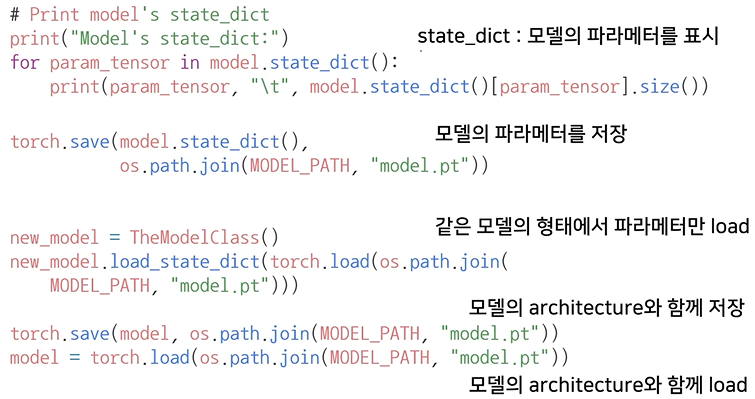

### Checkpoints
- 학습의 중간 결과를 저장해서 최선의 결과를 선택함
- ealrystopping 기법을 사용할 때 사용함
- loss와 metric 값을 지속적으로 확인하고 저장한다. (epoch도 저장)
- 특히 colab에서 지속적인 학습을 위해 꼭 사용함
- 정보들을 담고 Dict 타입으로 save를 하면 된다.

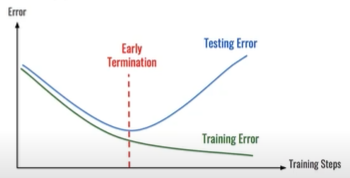

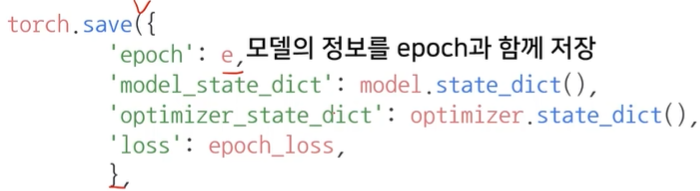

- 저장한 정보들을 load와 checkpoint를 통해 다시 확인이 가능함

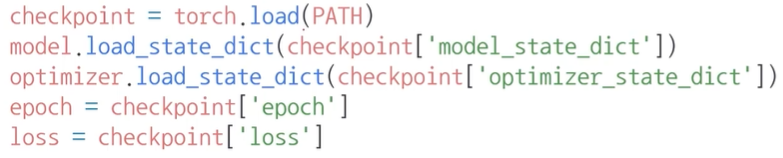

---
## Pretrained Model (전이 학습)
- 다른 데이터셋으로 만든 모델을 현재 데이터에 적용을 한다.
- ex) ImageNet 모델을 개와 고양이 판별에 사용하는 것
- 대용량 데이터셋으로 만든 모델의 성능이 좋기 때문에 적은 데이터를 가진 모델에 적용을 하는 것임.
- 이미 잘 학습된 모델에서 일부분만 변경해서 학습을 수행할 수 있다.
- TorchVision이나 각종 깃허브에 다양한 기본 모델을 제공한다.

### Freezing
- 전이학습을 활용시에 모델의 일부분을 frozen 시킨다.
- 전이한 모델의 특정 부분에서 멈추고, 파라미터 값을 안 받는 것을 의미함.
- 역전파를 할 때, 일부 레이어에서만 일어나게 한다.

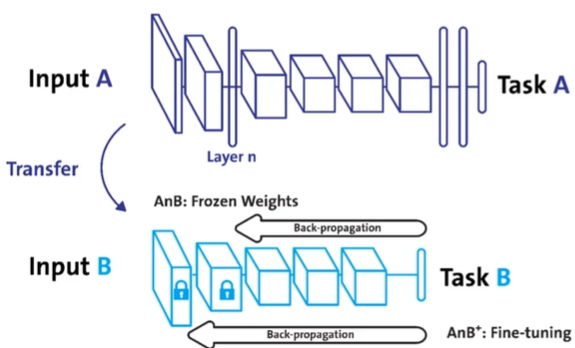

### 코드로 구조 보기
- 이미 학습된 vgg16 모델을 가져옴. (output이 1000개임)
- 내가 만든 모델 끝에 linear_layers를 달아준다.(input 1000개 받고 output 1개)
- vgg가 끝나고 linear_layers 실행시킴
- 모든 파라미터를 frozen 시키고, 내가 학습시키고 싶은 linear_layers부분만 역전파할 수 있도록 변경함

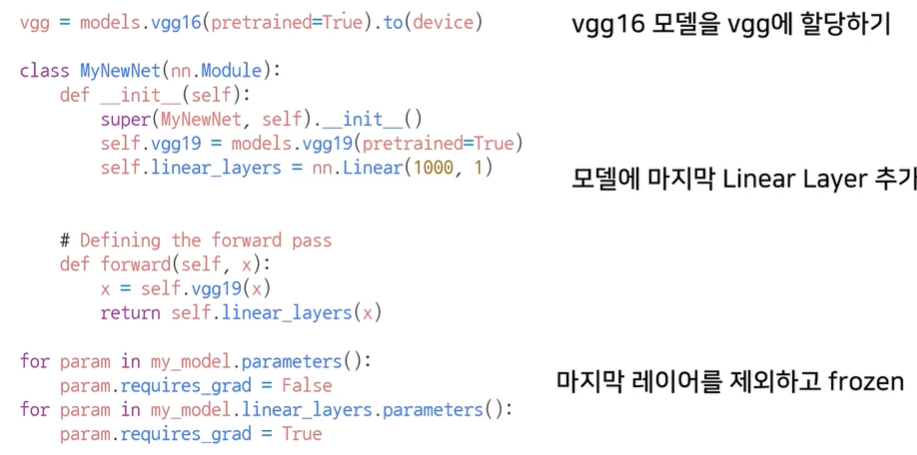

In [ ]:
# pretrained 모델과 내가 설정한 레이어에 대한 파라미터 자세히 확인하기

# my_model.vgg19.features._modules['0'].parameters()
# my_model.linear_layers.parameters()